In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/thyroid_cancer_risk_data.csv')

In [3]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [5]:
data.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [6]:
data['Diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [7]:
data['Thyroid_Cancer_Risk'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

### EDA:

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64
Diagnosis
Benign       76.729152
Malignant    23.270848
Name: count, dtype: float64


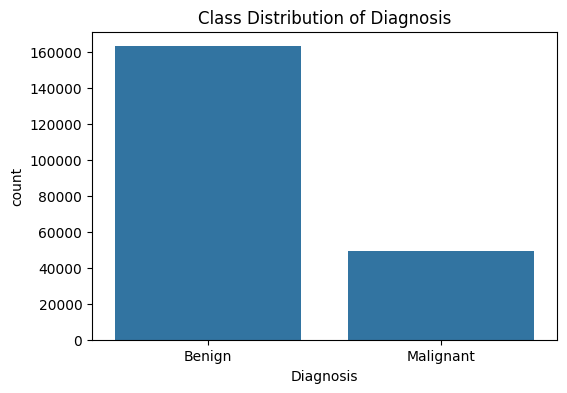

In [8]:
# For diagnosis
data_count = data['Diagnosis'].value_counts()
data_per = (data_count / len(data)) * 100
print(data_count)
print(data_per)

plt.figure(figsize = (6,4))
sns.countplot(x = 'Diagnosis', data= data)
plt.title("Class Distribution of Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('count')
plt.show()


<Axes: >

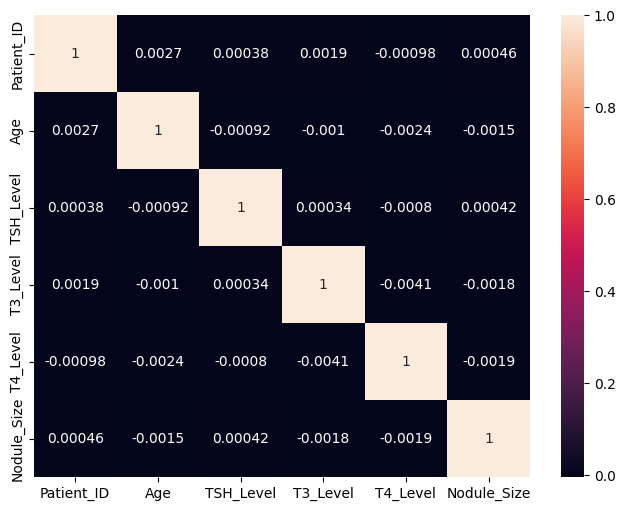

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot = True)

In [10]:
cat_col = data.select_dtypes(include= ['object']).columns
num_col = data.select_dtypes(exclude= ['object']).columns

In [11]:
cat_col

Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [12]:
num_col

Index(['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level',
       'Nodule_Size'],
      dtype='object')

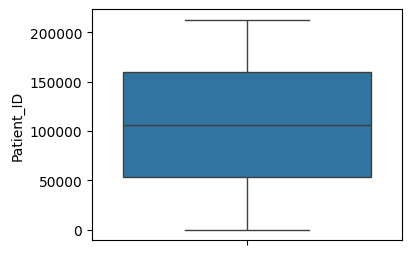

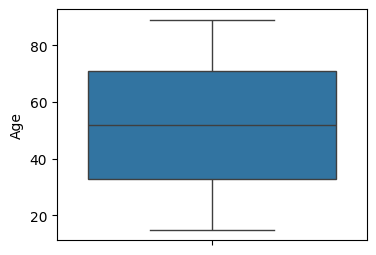

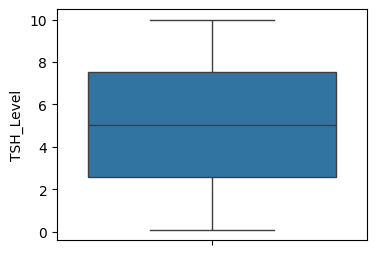

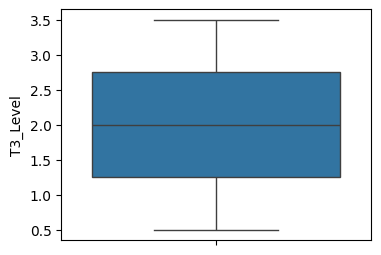

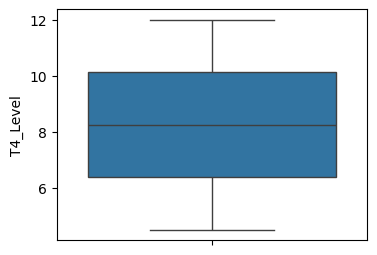

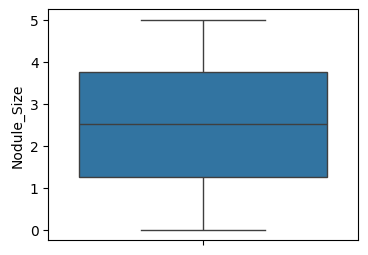

In [13]:
for i in num_col:
  plt.figure(figsize=(4,3))
  sns.boxplot(data[i])
  plt.show()

Through boxplot we found the data free from outliers.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
  data[i] = le.fit_transform(data[i])

In [15]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,2,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,3,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,4,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,5,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0


In [17]:
data.drop(columns = ['Patient_ID','Country'])

,Age,Gender,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,29,1,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,86,1,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,75,0,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,35,0,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,1,0,0,0,0,1,0,2.00,0.64,11.92,1.48,1,0
212687,89,1,4,0,0,0,0,1,0,9.77,3.25,7.30,4.46,2,0
212688,72,0,3,0,0,0,0,0,1,7.72,2.44,8.71,2.36,2,0
212689,85,0,4,0,0,0,0,0,1,5.62,2.53,9.62,1.54,2,0


In [25]:
# Separate features (X) and target (y)
X = data.drop('Diagnosis', axis=1)  # Replace 'Thyroid_Cancer_Risk' if your target is different
y = data['Diagnosis']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     32615
           1       0.67      0.09      0.16      9924

    accuracy                           0.78     42539
   macro avg       0.73      0.54      0.51     42539
weighted avg       0.76      0.78      0.71     42539

